In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [15]:
digits = pd.read_csv('train.csv')

In [16]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
digits.shape

(42000, 785)

In [18]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [19]:
digits.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [20]:
sorted(digits.label.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [21]:
y = digits['label']
X = digits.drop(labels='label', axis=1)

Text(0.5, 1.0, '1')

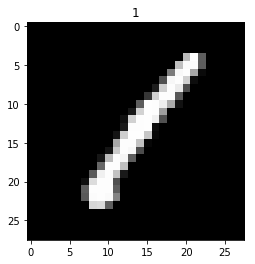

In [22]:
a = np.array(X.iloc[0]).reshape(28,28)
plt.imshow(a, cmap='gray')
plt.title(y.iloc[0])

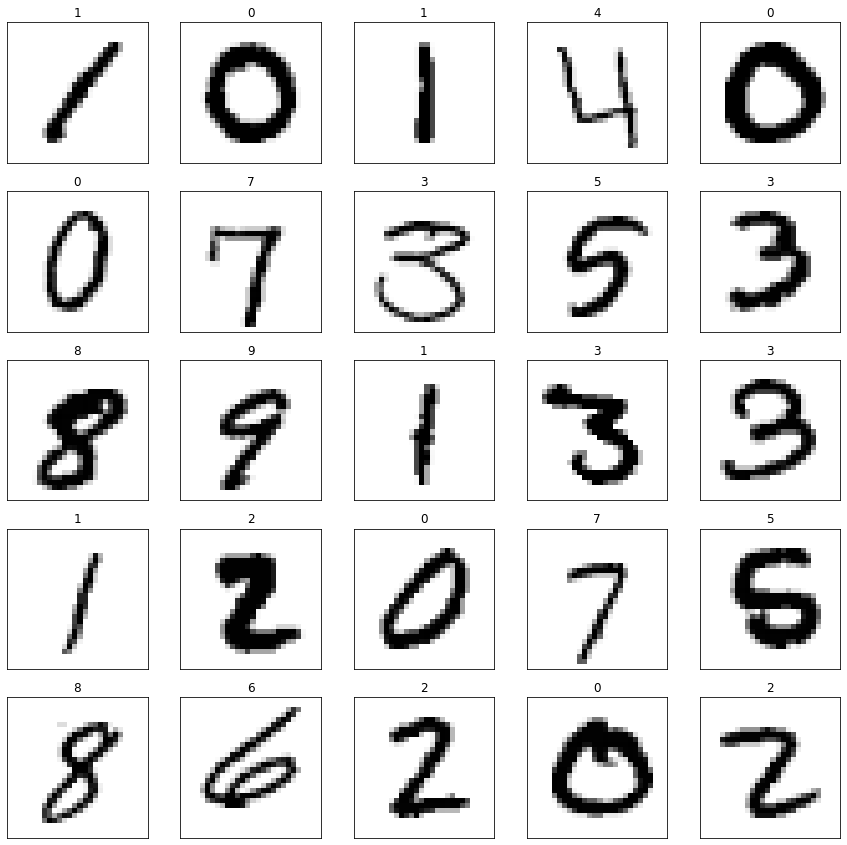

In [23]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    a = np.array(X.iloc[i]).reshape(28,28)
    fig = plt.imshow(a, cmap='binary')
#     plt.axis('off')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.title(y.iloc[i])

### scaling the data

In [24]:
X.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [25]:
# scaler = StandardScaler()

In [26]:
X = scale(X)

# train test split with train_size=10% and test size=90%
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.10, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(4200, 784)
(37800, 784)
(4200,)
(37800,)


#### SVM Modellling

In [27]:
# optimal hyperparameters
best_C = 1
best_gamma = 0.001

# model
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# fit
svm_final.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
# predict
predictions = svm_final.predict(x_test)
# evaluation: CM 
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)

# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)

print(test_accuracy, "\n")
print(confusion)


0.924973544973545 

[[3587    0   10   10    5   15   50   12   25    1]
 [   0 4108   14   16    5    3    6   18   10    5]
 [  24   23 3407   65   44    5   36  123   54    9]
 [   4   21   86 3502    5   89   11   73   76   33]
 [   3   11   36    7 3450   13   23   43    6  110]
 [  20   29   14  114   18 3020   79   53   36   35]
 [  31   12   11    1   14   34 3521   44   25    0]
 [   4   28   27    8   36    7    1 3739    7   97]
 [  14   59   32   80   22   97   25   44 3251   41]
 [  23   13   13   50   98    7    0  176   19 3379]]


#### on Verification data

In [37]:
verification_data = pd.read_csv('test.csv')

In [38]:
verification_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


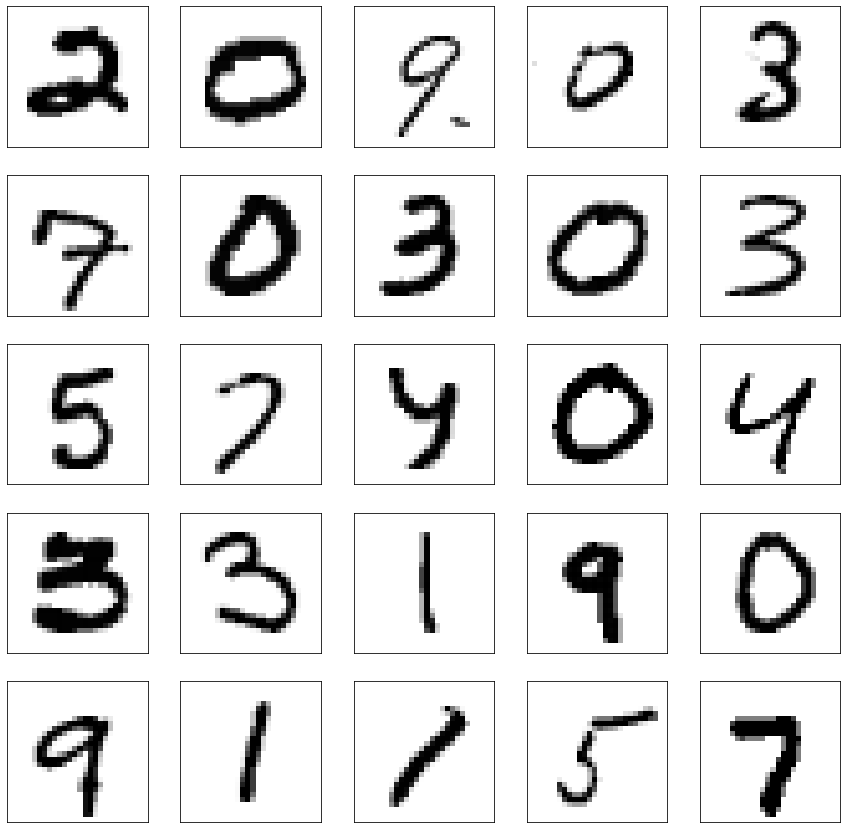

In [39]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    a = np.array(verification_data.iloc[i]).reshape(28,28)
    fig = plt.imshow(a, cmap='binary')
#     plt.axis('off')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

In [40]:
verification_data = scale(verification_data)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [41]:
predictions = svm_final.predict(verification_data)

In [42]:
predictions.shape

(28000,)

In [43]:
submission = pd.DataFrame({
        "ImageId": np.arange(1,28001),
        "Label": predictions
    })
submission.to_csv('submission_svm.csv', index=False)

In [44]:
np.unique(predictions)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

### PCA

In [45]:
x_train.shape

(4200, 784)

In [46]:
pca = PCA(svd_solver='randomized', random_state=42)

In [47]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [48]:
len(pca.components_)

784

In [49]:
pca.explained_variance_ratio_.round(3)[:50]

array([0.057, 0.04 , 0.038, 0.03 , 0.03 , 0.028, 0.026, 0.023, 0.019,
       0.017, 0.017, 0.016, 0.015, 0.014, 0.014, 0.013, 0.012, 0.012,
       0.011, 0.01 , 0.01 , 0.01 , 0.01 , 0.009, 0.009, 0.009, 0.008,
       0.008, 0.008, 0.008, 0.008, 0.007, 0.007, 0.007, 0.007, 0.007,
       0.007, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.005, 0.005,
       0.005, 0.005, 0.005, 0.005, 0.005])

In [50]:
np.cumsum(pca.explained_variance_ratio_[:100])

array([0.05701923, 0.09748125, 0.13504618, 0.16553915, 0.19545737,
       0.22380049, 0.24977784, 0.27243936, 0.29098073, 0.30833475,
       0.32491452, 0.3407991 , 0.35565938, 0.3696803 , 0.38335189,
       0.39610811, 0.40837802, 0.42015965, 0.43130154, 0.44177703,
       0.45213631, 0.46201802, 0.47158713, 0.48099616, 0.49007384,
       0.49893476, 0.50742717, 0.51562946, 0.52369001, 0.53158267,
       0.53932057, 0.54681825, 0.55402926, 0.56099031, 0.56778933,
       0.57449377, 0.58100119, 0.58721405, 0.59332985, 0.59938381,
       0.60529785, 0.61114906, 0.61678997, 0.62224889, 0.62754425,
       0.63277256, 0.6378637 , 0.64288941, 0.64786242, 0.65277621,
       0.65766364, 0.66237965, 0.66702832, 0.67155725, 0.67600381,
       0.68041485, 0.68480393, 0.68905862, 0.69318772, 0.69725453,
       0.70121012, 0.70505703, 0.70883211, 0.71257336, 0.71620053,
       0.71977704, 0.72330429, 0.72672643, 0.73012398, 0.73345754,
       0.73673526, 0.73996477, 0.7431528 , 0.74630416, 0.74938

AttributeError: module 'matplotlib.pyplot' has no attribute 'y'

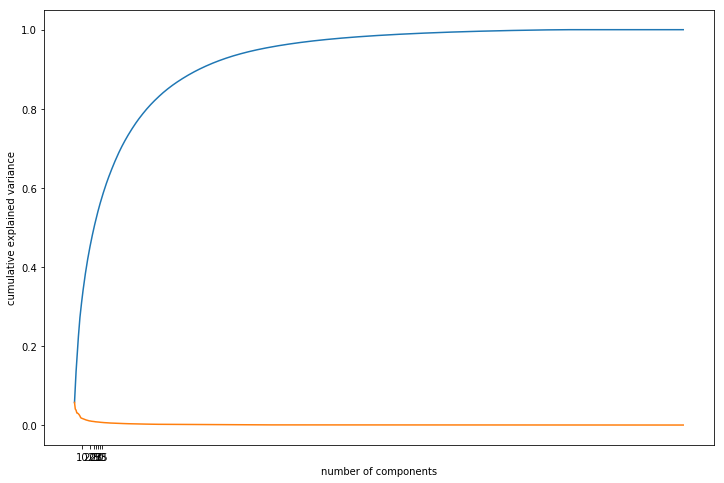

In [51]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xticks(ticks=[10,20,25,27,30,33,35], labels=[10,20,25,27,30,33,35])
plt.y
plt.show()

In [ ]:
NCOMPONENTS = 100

pca = PCA(n_components=NCOMPONENTS, sol)
x_pca_train = pca.fit_transform(x_train)
x_pca_test = pca.transform(x_test)
pca_std = np.std(x_pca_train)

print(x_train.shape)
print(x_pca_train.shape)

In [ ]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca = IncrementalPCA(n_components=100)

x_pca_train = pca.fit_transform(x_train)
x_pca_test = pca.transform(x_test)
pca_std = np.std(x_pca_train)

print(x_train.shape)
print(x_pca_train.shape)

In [ ]:
corrmat = np.corrcoef(x_pca_train.transpose())

In [ ]:
# plt.figure(figsize = (20,10))
# sns.heatmap(np.round(corrmat,4),annot = True)

In [ ]:
best_C = 1
best_gamma = 0.001

# model
svm_pca = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# fit
svm_pca.fit(x_pca_train, y_train)

In [ ]:
# predict
predictions = svm_pca.predict(x_pca_test)
# evaluation: CM 
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)

# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)

print(test_accuracy, "\n")
print(confusion)
